# Utilizing machine learning algorithms to predict CO2 emissions from vehicle features in the UK

### Meriam Saad Kharchef

## MSc Big Data Science - Final Project
### In this notebook, I will Implement the training, testing and tuning of the chosen regression models 

Here i will be testing 3 Machine Learning models without hyper parameter tuning that are:



*   XGBoost eXtreme Gradient Boosting
*   KNN K-Nearest Neighbors Algorithm (regressor)
*   SVR support vector regression

These models were chosen because they are known to preferom well with regression tasks


XGBoost doesnt require feature scaling while Both K-Nearest Neighbors (KNN) and Support Vector Regression (SVR) rely on distance-based metrics to make predictions, so feature scaling is necessary to ensure that each feature contributes equally to the distance computation, preventing features with larger scales from disproportionately influencing the model's results.

# Why these models were chosen

XGBoost: the speed, accuracy, and ability to handle linear/nonlinear data.  its use in various fields and its performance compared to other models.its advantages for large data sets and performance.

K-Nearest Neighbors (KNN): The explanation of KNN's application for both regression and classification, and its ability to handle correlated features and adapt to changing data densities.

Support Vector Regressor (SVR): SVR focuses on its ability to handle outliers, overfitting issues, and the generalization capability of the model. 

# Training testing XGBoost with ordinal encoding for catigorical features

## Imports

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from joblib import dump
from collections import OrderedDict as OrderedSet
import numpy as np


Loading the data

In [2]:
govData = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")


## Define Features and Target

In [3]:
ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

## Prepare Data with Ordinal Encoding

In [4]:
from collections import OrderedDict as OrderedSet

# Copy the required columns
X_ordinal = govData[features].copy()
y = govData[target]

# Perform ordinal encoding
cateDict = {}
for category in cateFeatures:
    value = 0
    cateDict[category] = dict()
    for option in OrderedSet(X_ordinal[category]):
        cateDict[category][option] = value
        value += 1
    X_ordinal[category] = X_ordinal[category].map(cateDict[category])


## Split Data into Training and Test Sets

In [5]:
from sklearn.model_selection import train_test_split

testSize = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_ordinal, y, test_size=testSize, random_state=1)


 Train the Model

In [6]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=10, n_estimators=50, seed=1)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Evaluating Training Performance

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

train_preds = xgb_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
train_r2 = r2_score(y_train, train_preds)
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)


Train RMSE: 17.346056700207225
Train R2: 0.8975081472170376


## Testing the model

In [8]:
test_preds = xgb_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Test RMSE: 17.898733506260537
Test R2: 0.8885188667469246


## Now expermenting with XGBoost One-hot encoding for catigorical features

## Define Features and Target

In [9]:
ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

## Prepare Data with One-Hot Encoding

In [10]:
# Copy the required columns
X_onehot = govData[features].copy()
y = govData[target]

# Perform one-hot encoding
X_onehot = pd.get_dummies(data=X_onehot, drop_first=True, columns=cateFeatures)


## Split Data into Training and Test Sets

In [11]:
from sklearn.model_selection import train_test_split

testSize = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=testSize, random_state=1)

## Train the Model

In [12]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=10, n_estimators=50, seed=1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Evaluate Training Performance

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

train_preds = xgb_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
train_r2 = r2_score(y_train, train_preds)
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)

Train RMSE: 11.78314877447576
Train R2: 0.9527055103888838


Evaluate Testing Performance

In [14]:
test_preds = xgb_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Test RMSE: 13.054914254540938
Test R2: 0.9406931553588072


# Using KNN One-hot ecoding

## Impute and Scale the Data

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create an imputer object that replaces 'NaN' with the mean value of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to your one-hot encoded data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # use the same imputer to ensure the same transformation

# Scale the data (important for KNN due to its reliance on distances)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


## Train and Test the KNN Model

In [16]:
from sklearn.neighbors import KNeighborsRegressor

print("\n(3) Scikit KNN - One-hot")

# Instantiate KNN regressor and fit with One-hot encoding
knn = KNeighborsRegressor(n_neighbors=5)  # You can change n_neighbors as needed
knn = knn.fit(X_train_scaled, y_train)
trainPreds = knn.predict(X_train_scaled)
testPreds = knn.predict(X_test_scaled)

# Calculate RMSE of KNN on training and testing data
print("Train RMSE: %f" % (np.sqrt(mean_squared_error(y_train, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(y_test, testPreds))))
print("Train Accuracy: %f" % (r2_score(y_train, trainPreds)))
print("Test Accuracy: %f" % (r2_score(y_test, testPreds)))



(3) Scikit KNN - One-hot
Train RMSE: 12.765978
Test RMSE: 15.153627
Train Accuracy: 0.944487
Test Accuracy: 0.920092


## KNN with Ordianl Encoding

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Split data into training and test sets
X_train_ordinal, X_test_ordinal, y_train, y_test = train_test_split(X_ordinal, y, test_size=0.2, random_state=1)

# Create an imputer object that replaces 'NaN' with the mean value of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer
X_train_ordinal_imputed = imputer.fit_transform(X_train_ordinal)
X_test_ordinal_imputed = imputer.transform(X_test_ordinal)

# Scale the data
scaler = StandardScaler()
X_train_ordinal_scaled = scaler.fit_transform(X_train_ordinal_imputed)
X_test_ordinal_scaled = scaler.transform(X_test_ordinal_imputed)

print("\n(3) Scikit KNN - Ordinal")

# Instantiate KNN regressor and fit with Ordinal encoding
knn = KNeighborsRegressor(n_neighbors=5)
knn = knn.fit(X_train_ordinal_scaled, y_train)
trainPreds = knn.predict(X_train_ordinal_scaled)
testPreds = knn.predict(X_test_ordinal_scaled)

# Calculate RMSE of KNN on training and testing data
print("Train RMSE: %f" % (np.sqrt(mean_squared_error(y_train, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(y_test, testPreds))))
print("Train Accuracy: %f" % (r2_score(y_train, trainPreds)))
print("Test Accuracy: %f" % (r2_score(y_test, testPreds)))



(3) Scikit KNN - Ordinal
Train RMSE: 18.903668
Test RMSE: 19.776076
Train Accuracy: 0.878275
Test Accuracy: 0.863907


# Support Vector Regressor SVR with ordinal encoding

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create an imputer object that replaces 'NaN' with the mean value of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to your ordinal data
X_train_ordinal_imputed = imputer.fit_transform(X_train_ordinal)
X_test_ordinal_imputed = imputer.transform(X_test_ordinal)

# Scale the data
scaler = StandardScaler()
X_train_ordinal_scaled = scaler.fit_transform(X_train_ordinal_imputed)
X_test_ordinal_scaled = scaler.transform(X_test_ordinal_imputed)

print("\n(3) Scikit SVR - Ordinal")

# Instantiate SVR and fit with Ordinal encoding
svr = SVR(kernel='linear')  # using linear kernel as an example; you can explore other kernels like 'rbf', 'poly', etc.
svr = svr.fit(X_train_ordinal_scaled, y_train)
trainPreds = svr.predict(X_train_ordinal_scaled)
testPreds = svr.predict(X_test_ordinal_scaled)

# Calculate RMSE of SVR on training and testing data
print("Train RMSE: %f" % (np.sqrt(mean_squared_error(y_train, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(y_test, testPreds))))
print("Train Accuracy: %f" % (r2_score(y_train, trainPreds)))
print("Test Accuracy: %f" % (r2_score(y_test, testPreds)))



(3) Scikit SVR - Ordinal
Train RMSE: 38.832874
Test RMSE: 38.136703
Train Accuracy: 0.486327
Test Accuracy: 0.493892


## Support vector regressor with one hot encoding

In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

# Copy the required columns
X_onehot = govData[features].copy()
y = govData[target]

# Perform one-hot encoding
X_onehot = pd.get_dummies(data=X_onehot, drop_first=True, columns=cateFeatures)
from sklearn.model_selection import train_test_split

testSize = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=testSize, random_state=1)

# Scaling features (SVR requires feature scaling)
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

# Create SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train.ravel())

# Predictions and evaluation
train_preds = svr_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
train_r2 = r2_score(y_train, train_preds)
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)

test_preds = svr_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)


Train RMSE: 0.28603595373197815
Train R2: 0.9181834331726376
Test RMSE: 0.2952924791682156
Test R2: 0.9109213303672279


# FURTHER HYPER PARAMETER TUNING FOR ALL THREE MODELS

### Because one hot encoding preformded well across all the chosen models i will be countinouing to use it  to futher do both basic and advanced hyper parameter tuning for all 3 models using both:

### Basic: Using grid search cross validation (GSCV) (For The best preforming model i will plot actual vs predicted and a feature importance bar plot)

### Advanced: Using Hyperopt using bayesian optimisation (For The best preforming model i will plot actual vs predicted and a feature importance bar plot)

# BASIC HYPER PARAMETER TUNING GSCV (GRID SEARCH CROSS VALIDATION )

# GRID SEARCH CROSS VALIDATION FOR XGBOOST ONE HOT ENCODING

#### the further hyper parameter tuning will be done using one hot encoding as it was the best prefroming encoding technique form what we have seen in the prevouis step

## imports

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
from joblib import dump

# Read the CSV file using pandas
govData = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")


## Define Features and Target:

In [21]:
ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

# Define arrays: features (X for one-hot encoding of categorical features), and target (y).
X_onehot = govData[features].copy()
y = govData[target]

# Encode categorical features
X_onehot = pd.get_dummies(X_onehot, columns=cateFeatures)


## Split the Data into Training and Test Sets:

In [22]:
# Split the data into training and test sets.
trainX_onehot, testX_onehot, trainy, testy = train_test_split(X_onehot, y, test_size=0.2, random_state=1)


## Model Configuration and Grid Search:

In [23]:
# Parameter grid for GridSearchCV
params_grid = {
    "min_child_weight": [1, 5],
    "gamma": [0.5, 1, 2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "max_depth": [3, 5],
    "learning_rate": [0.02, 0.1],
    "n_estimators": [100, 300],
}
# Instantiate XGBRegressor
xgb = XGBRegressor(objective="reg:squarederror", verbosity=0, nthread=-1, seed=1)

# Configure Grid Search
grid_search = GridSearchCV(xgb, param_grid=params_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, verbose=0)

# Fit the grid search to the training data
grid_search.fit(trainX_onehot, trainy)

# Print the best parameters
print("Best grid search hyperparameters: ", grid_search.best_params_)

# Create XGB using grid search's best found hyperparameters.
best_xgb = XGBRegressor(**grid_search.best_params_, objective="reg:squarederror", verbosity=0, nthread=-1, seed=1)


Best grid search hyperparameters:  {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


## Train the Model and Make Predictions:

In [24]:
# Fit the best model to the training data
best_xgb.fit(trainX_onehot, trainy)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, nthread=-1, num_parallel_tree=None,
             predictor=None, ...)

### Predict on training and test data

In [25]:

# Predict on training and test data
trainPreds = best_xgb.predict(trainX_onehot)
testPreds = best_xgb.predict(testX_onehot)


## Evaluate the Model:

In [26]:
# Print the results
print("\nTrain RMSE: %f" % (np.sqrt(mean_squared_error(trainy, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(testy, testPreds))))
print("\nTrain R-squared: %f" % (r2_score(trainy, trainPreds)))
print("Test R-squared: %f" % (r2_score(testy, testPreds)))



Train RMSE: 12.268880
Test RMSE: 13.606344

Train R-squared: 0.948726
Test R-squared: 0.935577


In [27]:
# Save the best trained XGBoost model
dump(best_xgb, 'best_xgb.predict.joblib')

['best_xgb.predict.joblib']

In [77]:
def predict(input_data, features):
    # Defining the features
    ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
    cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain", "Year"]
    features = ctsFeatures + cateFeatures
    
    # Prepare input data for prediction
    input_df_empty = pd.DataFrame([], columns=X_onehot.columns)
    input_df = pd.DataFrame([input_data], columns=features)
    input_df[ctsFeatures] = input_df[ctsFeatures].apply(pd.to_numeric)
    input_encoded = pd.get_dummies(input_df, columns=cateFeatures)

    for col in input_encoded.columns:
        input_df_empty[col] = input_encoded[col]

    input_df_final = input_df_empty.fillna(0)
    
    # Scale the input data
    input_scaled = scaler.transform(input_df_final)

    # Make predictions
    predictions = best_xgb.predict

    return predictions


In [78]:
predict(input_data, features)

NameError: name 'input_data' is not defined

In [198]:
testX_onehot

,Engine Capacity,Engine Power (PS),Manufacturer_ABARTH,Manufacturer_ALFA ROMEO,Manufacturer_ALPINE,Manufacturer_ASTON MARTIN LAGONDA,Manufacturer_BENTLEY MOTORS,Manufacturer_BMW,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,...,Powertrain_Hybrid Electric Vehicle (HEV),Powertrain_Internal Combustion Engine (ICE),Powertrain_Micro-hybrid,Powertrain_Mild Hybrid Electric Vehicle (MHEV),Powertrain_Plug-in Hybrid Electric Vehicle (PHEV),Year_2019,Year_2020,Year_2021,Year_2022,Year_2023
14810,1498,150.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
18941,2996,367.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15031,1798,112.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
25225,1969,190.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21223,1499,125.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,1461,95.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
702,6449,785.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
17538,1598,136.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
17217,1498,173.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### Plotting predicted VS Actual 

C:\Users\study\AppData\Local\Temp\ipykernel_33940\343371279.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], '--k', color='red')


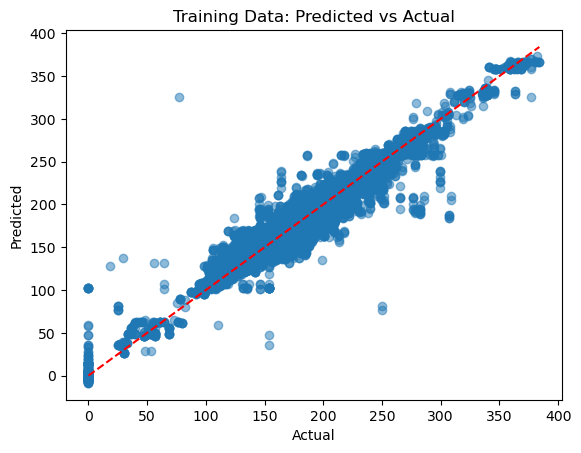

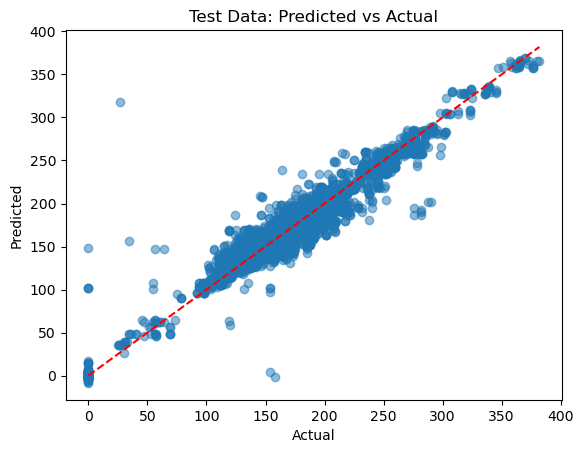

In [28]:
import matplotlib.pyplot as plt

def plot_predicted_vs_actual(actual, predicted, title):
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], '--k', color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot for training data
plot_predicted_vs_actual(trainy, trainPreds, 'Training Data: Predicted vs Actual')

# Plot for test data
plot_predicted_vs_actual(testy, testPreds, 'Test Data: Predicted vs Actual')


## FEATURE IMPORTANCE FOR GRID SEARCH CROSS VALIDATION ONE HOT ENCODING

In [206]:
import matplotlib.pyplot as plt

In [207]:
# Get feature importance
importance = best_xgb.feature_importances_

In [208]:
# Sum up the importance for one-hot encoded features
importance_dict = {}
for i, col_name in enumerate(trainX_onehot.columns):
    base_name = col_name.split('_')[0]
    if base_name in cateFeatures:
        if base_name not in importance_dict:
            importance_dict[base_name] = 0
        importance_dict[base_name] += importance[i]
    else:
        importance_dict[col_name] = importance[i]

In [209]:
# Sort by importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

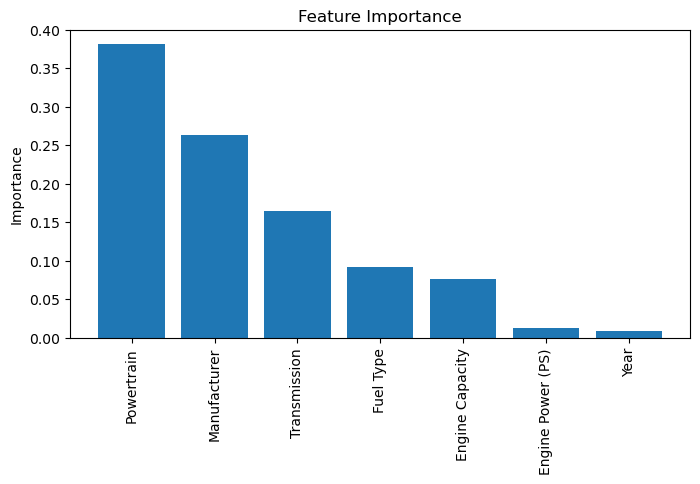

In [211]:
# Plot
plt.figure(figsize=(8,4))
plt.bar([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# KNN GRID SEARCH CROSS VALIDATION ONE HOT ENCODING

Import

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

In [36]:
# Read the CSV file using pandas
govData = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")

## Define features and target

In [37]:
ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

## Encoding

In [32]:
X_onehot = govData[features].copy()
y = govData[target]
X_onehot = pd.get_dummies(X_onehot, columns=cateFeatures)

## Train-test split and feature scaling

In [33]:
testSize = 0.2
trainX_onehot, testX_onehot, trainy, testy = train_test_split(X_onehot, y, test_size=testSize, random_state=1)
scaler = StandardScaler()
trainX_onehot = scaler.fit_transform(trainX_onehot)
testX_onehot = scaler.transform(testX_onehot)

## Hyperparameter tuning using Grid Search

In [34]:
params_grid = {
    "n_neighbors": [2, 4, 8, 12, 14, 16],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": list(range(1, 11))
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid=params_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, verbose=3)
grid_search.fit(trainX_onehot, trainy)
print("Best grid search hyperparameters: ", grid_search.best_params_)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best grid search hyperparameters:  {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}


## Model Training with best hyperparameters

In [22]:
best_knn = KNeighborsRegressor(**grid_search.best_params_)
best_knn.fit(trainX_onehot, trainy)


KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=12,
                    weights='distance')

## Prediction and Evaluation

In [23]:
trainPreds = best_knn.predict(trainX_onehot)
testPreds = best_knn.predict(testX_onehot)

print("Train RMSE: %f" % (np.sqrt(mean_squared_error(trainy, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(testy, testPreds))))
print("Train Accuracy: %f" % (r2_score(trainy, trainPreds)))
print("Test Accuracy: %f" % (r2_score(testy, testPreds)))


Train RMSE: 12.119075
Test RMSE: 14.384847
Train Accuracy: 0.949970
Test Accuracy: 0.927994


## SVR Support Vector Regressor GRID SEARCH CROSS VAIDATION (GSCV) ONE HOT ENCODING

## Import Libraries

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

## loading the data set

In [39]:
# Read the CSV file using pandas
govData = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")

## Define Features and Target

In [40]:
ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

## encoding

In [41]:
# Define arrays: features (X_onehot for one-hot encoding of categorical features), and target (y).
X_onehot = govData[features].copy()
y = govData[target]

# Encode categorical features
X_onehot = pd.get_dummies(X_onehot, columns=cateFeatures)

# Define training and testing arrays. Test sets are a hold-out to check models against after CV.
testSize = 0.2
trainX_onehot, testX_onehot, trainy, testy = train_test_split(X_onehot, y, test_size=testSize, random_state=1)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
trainX_onehot = scaler.fit_transform(trainX_onehot)
testX_onehot = scaler.transform(testX_onehot)


## Hyperparameter Tuning with Grid Search

In [42]:
# Parameters grid for SVR
params_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [1, 10, 100],
    "epsilon": [0.01, 0.1],
    "degree": [2, 3]  # Only considered when kernel is "poly"
}

# Instantiate SVR
svr = SVR()

# Configure Grid Search
grid_search = GridSearchCV(svr, param_grid=params_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, verbose=3)

# Fit the grid search
grid_search.fit(trainX_onehot, trainy)

# Print the best parameters
print("Best grid search hyperparameters: ", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best grid search hyperparameters:  {'C': 100, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf'}


## Create and Fit the Best Model

In [43]:
# Create SVR using grid search's best found hyperparameters.
best_svr = SVR(**grid_search.best_params_)

# Fit the best model
best_svr.fit(trainX_onehot, trainy)

SVR(C=100, degree=2)

## Predict and Evaluate

In [44]:
# Predict on training and test data
trainPreds = best_svr.predict(trainX_onehot)
testPreds = best_svr.predict(testX_onehot)

# Print the results
print("Train RMSE: %f" % (np.sqrt(mean_squared_error(trainy, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(testy, testPreds))))
print("Train Accuracy: %f" % (r2_score(trainy, trainPreds)))
print("Test Accuracy: %f" % (r2_score(testy, testPreds)))


Train RMSE: 14.794175
Test RMSE: 15.594156
Train Accuracy: 0.925446
Test Accuracy: 0.915379


# ADVANCED HYPER PARAMETER TUNING HYPEROPT BAYESIAN OPTIMISATION

## Bayesian Optimization:

Utilizes a probabilistic model to predict the objective function value for different hyperparameter settings.

Explores the hyperparameter space more intelligently than random or grid search.

Common libraries for this approach include Hyperopt, Spearmint, and others.

## XGBOOST USING HYPEROPT BAYESIAN OPTIMISATION ONE HOT ENCODING


Importing neccessary libraries 

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
from time import time
from hyperopt import fmin, tpe, hp
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np
from time import time
from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

In [60]:
# Read the CSV file using pandas
govData = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")

In [61]:
ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

In [62]:
# Create feature and target arrays
X_onehot = govData[features].copy()
y = govData[target]


In [63]:
# Encode categorical features
X_onehot = pd.get_dummies(X_onehot, columns=cateFeatures)

In [64]:
# Create the train/test split
testSize = 0.2
trainX_onehot, testX_onehot, trainy, testy = train_test_split(X_onehot, y, test_size=testSize, random_state=1)

In [65]:
# Feature Scaling
scaler = StandardScaler()
trainX_onehot = scaler.fit_transform(trainX_onehot)
testX_onehot = scaler.transform(testX_onehot)

In [66]:
# Hyperparameters for HYPEROPT Bayesian Optimisation (with TPE).
params_hyperopt = {
    "max_depth": hp.choice("max_depth", np.arange(3, 7+1, dtype=int)),
    "gamma": hp.uniform("gamma", 0.5, 5),
    "reg_alpha": hp.uniform("reg_alpha", 0, 5),
    "subsample": hp.uniform("subsample", 0.4, 1),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.4, 1),
    "min_child_weight": hp.choice("min_child_weight", np.arange(1, 10+1, dtype=int)),
    "learning_rate":  hp.uniform ("learning_rate", 0.01, 0.5),
    "n_estimators": hp.choice("n_estimators", np.arange(100, 600+1, dtype=int))
}

In [70]:
# Custom evaluation function to keep track of train and test RMSE
def custom_eval(space):
    model = XGBRegressor(**space, objective="reg:squarederror", verbosity=0, nthread=-1, seed=1)
    
    eval_set = [(trainX_onehot, trainy), (testX_onehot, testy)]
    eval_result = model.fit(trainX_onehot, trainy, eval_metric="rmse", eval_set=eval_set, verbose=False)
    
    train_loss = eval_result.evals_result()['validation_0']['rmse']
    test_loss = eval_result.evals_result()['validation_1']['rmse']
    
    # You may return or utilize the losses as needed for your project
    return mean_squared_error(testy, model.predict(testX_onehot))

In [74]:
# Time duration of HYPEROPT
rstate = np.random.default_rng(1)
t5 = time()

params_hyperopt_best = fmin(fn = lambda space: (-sum(cross_val_score(XGBRegressor(**space, objective="reg:squarederror", verbosity=0, nthread=-1, seed=1),
                                                                   trainX_onehot, trainy, scoring="neg_root_mean_squared_error", cv=10))/10),
                            space = params_hyperopt, algo = tpe.suggest, max_evals = 100, rstate=rstate, return_argmin=False)
t6 = time()
print("Time elapsed in training: %f" % (t6-t5))

# Create XGB using HYPEROPT's best found hyperparameters.
xgb_onehot_hyperopt_best = XGBRegressor(**params_hyperopt_best, objective="reg:squarederror", verbosity=0, nthread=-1, seed=1)
xgb_onehot_hyperopt_best.fit(trainX_onehot, trainy)
trainPreds = xgb_onehot_hyperopt_best.predict(trainX_onehot)
testPreds = xgb_onehot_hyperopt_best.predict(testX_onehot)

print("Best HYPEROPT hyperparameters: ")
print(params_hyperopt_best)

print("Train RMSE: %f" % (np.sqrt(mean_squared_error(trainy, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(testy, testPreds))))
print("Train Accuracy: %f" % (r2_score(trainy, trainPreds)))
print("Test Accuracy: %f" % (r2_score(testy, testPreds)))

100%|██████████████████████████████████████████████| 100/100 [31:05<00:00, 18.66s/trial, best loss: 12.484512352946748]
Time elapsed in training: 1865.681918
Best HYPEROPT hyperparameters: 
{'colsample_bytree': 0.4770070719685614, 'gamma': 2.597188259597313, 'learning_rate': 0.38301251745554543, 'max_depth': 6, 'min_child_weight': 9, 'n_estimators': 406, 'reg_alpha': 1.9899253698206805, 'subsample': 0.9978835505476024}
Train RMSE: 11.078180
Test RMSE: 12.881270
Train Accuracy: 0.958195
Test Accuracy: 0.942260


In [72]:
# Save the trained XGBoost model
dump(xgb_onehot_hyperopt_best, 'xgb_model.joblib')

# Save the StandardScaler
dump(scaler, 'scaler.joblib')

['scaler.joblib']

### Viewing the Testing Data 

In [175]:
def predict(input_data, features):
    # Defining the features
    ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
    cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain", "Year"]
    features = ctsFeatures + cateFeatures
    
    # Prepare input data for prediction
    input_df_empty = pd.DataFrame([], columns=X_onehot.columns)
    input_df = pd.DataFrame([input_data], columns=features)
    input_df[ctsFeatures] = input_df[ctsFeatures].apply(pd.to_numeric)
    input_encoded = pd.get_dummies(input_df, columns=cateFeatures)

    for col in input_encoded.columns:
        input_df_empty[col] = input_encoded[col]

    input_df_final = input_df_empty.fillna(0)
    
    # Scale the input data
    input_scaled = scaler.transform(input_df_final)

    # Make predictions
    predictions = xgb_onehot_hyperopt_best.predict(input_scaled)

    return predictions


In [176]:
input_data = [ '1969', '390.0','VOLVO','8A-AWD','Electricity / Petrol','Plug-in Hybrid Electric Vehicle (PHEV)', "2023"]


In [178]:
predict(input_data, features)

array([89.44484], dtype=float32)

In [180]:
testX_onehot_df

,Engine Capacity,Engine Power (PS),Manufacturer_ABARTH,Manufacturer_ALFA ROMEO,Manufacturer_ALPINE,Manufacturer_ASTON MARTIN LAGONDA,Manufacturer_BENTLEY MOTORS,Manufacturer_BMW,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,...,Powertrain_Internal Combustion Engine (ICE),Powertrain_Micro-hybrid,Powertrain_Mild Hybrid Electric Vehicle (MHEV),Powertrain_Plug-in Hybrid Electric Vehicle (PHEV),Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,WLTP CO2
0,-0.354283,-0.311174,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,-1.888671,-0.027611,-0.164286,-0.146615,-0.519215,-0.475405,1.717225,-0.460133,-0.46112,130.0
1,1.401310,1.793268,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,0.529473,-0.027611,-0.164286,-0.146615,-0.519215,2.103470,-0.582335,-0.460133,-0.46112,204.0
2,-0.002695,-0.679694,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,-1.888671,-0.027611,-0.164286,-0.146615,-0.519215,-0.475405,1.717225,-0.460133,-0.46112,110.0
3,0.197710,0.076741,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,0.529473,-0.027611,-0.164286,-0.146615,1.925985,-0.475405,-0.582335,-0.460133,-0.46112,169.0
4,-0.353111,-0.553621,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,0.529473,-0.027611,-0.164286,-0.146615,1.925985,-0.475405,-0.582335,-0.460133,-0.46112,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5247,-0.397645,-0.844558,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,0.529473,-0.027611,-0.164286,-0.146615,-0.519215,-0.475405,1.717225,-0.460133,-0.46112,127.0
5248,5.448080,5.846986,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,0.529473,-0.027611,-0.164286,-0.146615,-0.519215,-0.475405,-0.582335,2.173283,-0.46112,373.0
5249,-0.237087,-0.446945,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,-1.888671,-0.027611,-0.164286,-0.146615,-0.519215,2.103470,-0.582335,-0.460133,-0.46112,120.0
5250,-0.354283,-0.088123,-0.093233,-0.093233,-0.058649,-0.051239,-0.054849,-0.009759,-0.021825,-0.015431,...,0.529473,-0.027611,-0.164286,-0.146615,-0.519215,2.103470,-0.582335,-0.460133,-0.46112,171.0


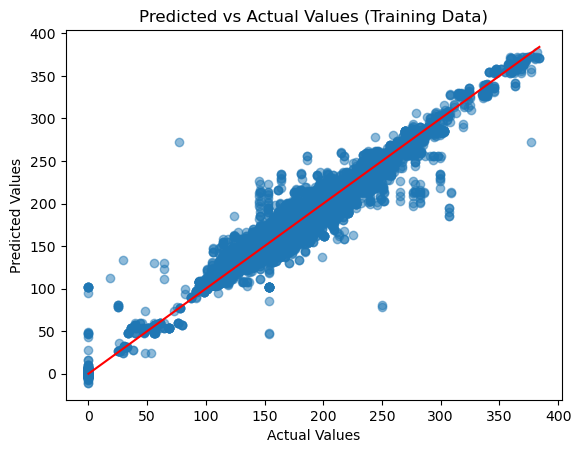

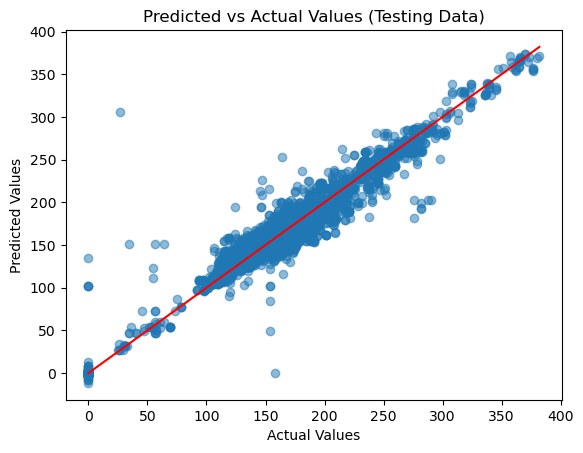

In [55]:
import matplotlib.pyplot as plt

# Function to plot predicted vs actual values
def plot_predicted_vs_actual(y_actual, y_pred, title):
    plt.scatter(y_actual, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')
    plt.show()

# Plotting for training data
plot_predicted_vs_actual(trainy, trainPreds, 'Predicted vs Actual Values (Training Data)')

# Plotting for testing data
plot_predicted_vs_actual(testy, testPreds, 'Predicted vs Actual Values (Testing Data)')




# Feature importance 


In [200]:
import matplotlib.pyplot as plt

# Get feature importance
importance = xgb_onehot_hyperopt_best.feature_importances_

In [201]:
# Sum up the importance for one-hot encoded features
importance_dict = {}
for i, col_name in enumerate(X_onehot.columns):
    base_name = col_name.split('_')[0]
    if base_name in cateFeatures:
        if base_name not in importance_dict:
            importance_dict[base_name] = 0
        importance_dict[base_name] += importance[i]
    else:
        importance_dict[col_name] = importance[i]

In [202]:
# Sort by importance
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

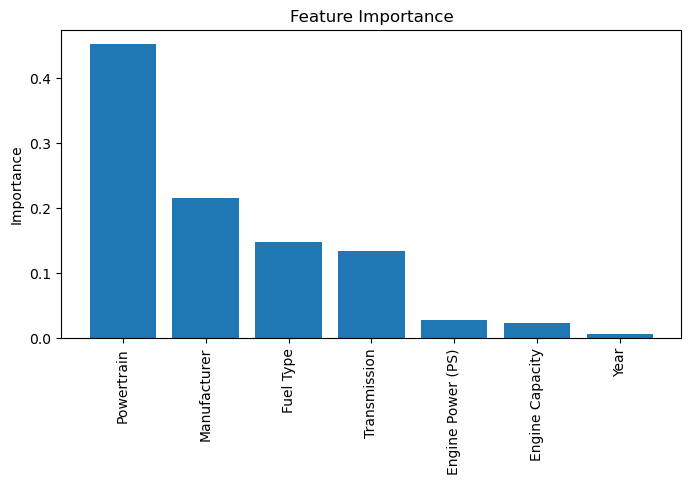

In [204]:
# Plot
plt.figure(figsize=(8,4))
plt.bar([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


# KNN USING HYPEROPT BAYESIAN OPTIMISATION (One hot encoding)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp
import numpy as np
from time import time

# Read the CSV file using pandas
govData = pd.read_csv('UK_gov_cleaned_data.csv', encoding="ISO-8859-1")

ctsFeatures = ["Engine Capacity", "Engine Power (PS)"]
cateFeatures = ["Manufacturer", "Transmission", "Fuel Type", "Powertrain","Year"]
features = ctsFeatures + cateFeatures
target = "WLTP CO2"

# Create feature and target arrays
X_onehot = govData[features].copy()
y = govData[target]

# Encode categorical features
X_onehot = pd.get_dummies(X_onehot, columns=cateFeatures)

# Create the train/test split
testSize = 0.2
trainX_onehot, testX_onehot, trainy, testy = train_test_split(X_onehot, y, test_size=testSize, random_state=1)

# Apply scaling
scaler = StandardScaler()
trainX_onehot = scaler.fit_transform(trainX_onehot)
testX_onehot = scaler.transform(testX_onehot)

# Hyperparameters for HYPEROPT Bayesian Optimisation (with TPE) for KNeighborsRegressor.
params_hyperopt = {
    "n_neighbors": hp.choice("n_neighbors", np.arange(1, 50+1, dtype=int)),
    "weights": hp.choice("weights", ["uniform", "distance"]),
    "p": hp.choice("p", [1, 2]),
}

# Time duration of HYPEROPT.
rstate = np.random.default_rng(1)  # Reproducibility.
t5 = time()

params_hyperopt_best = fmin(fn=lambda space: (-sum(cross_val_score(KNeighborsRegressor(**space),
                                                                   trainX_onehot, trainy, scoring="neg_root_mean_squared_error", cv=10)) / 10),
                            space=params_hyperopt, algo=tpe.suggest, max_evals=100, rstate=rstate, return_argmin=False)
t6 = time()
print("Time elapsed in training: %f" % (t6 - t5))

# Create KNeighborsRegressor using HYPEROPT's best found hyperparameters.
knn_onehot_hyperopt_best = KNeighborsRegressor(**params_hyperopt_best)
knn_onehot_hyperopt_best.fit(trainX_onehot, trainy)
trainPreds = knn_onehot_hyperopt_best.predict(trainX_onehot)
testPreds = knn_onehot_hyperopt_best.predict(testX_onehot)

print("Best HYPEROPT hyperparameters: ")
print(params_hyperopt_best)

print("Train RMSE: %f" % (np.sqrt(mean_squared_error(trainy, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(testy, testPreds))))
print("Train Accuracy: %f" % (r2_score(trainy, trainPreds)))
print("Test Accuracy: %f" % (r2_score(testy, testPreds)))


100%|██████████████████████████████████████████████| 100/100 [04:37<00:00,  2.77s/trial, best loss: 13.847341048919684]
Time elapsed in training: 277.329544
Best HYPEROPT hyperparameters: 
{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
Train RMSE: 10.871640
Test RMSE: 13.719861
Train Accuracy: 0.959740
Test Accuracy: 0.934498


# SVR USING HYPEROPT BAYESIAN OPTIMISATION (One hot encoding)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp
import numpy as np
from time import time



# Create feature and target arrays
X_onehot = govData[features].copy()
y = govData[target]

# Encode categorical features
X_onehot = pd.get_dummies(X_onehot, columns=cateFeatures)

# Split the data
testSize = 0.2
trainX_onehot, testX_onehot, trainy, testy = train_test_split(X_onehot, y, test_size=testSize, random_state=1)

# Standardize the data
scaler_X = StandardScaler().fit(trainX_onehot)
trainX_onehot = scaler_X.transform(trainX_onehot)
testX_onehot = scaler_X.transform(testX_onehot)
scaler_y = StandardScaler().fit(trainy.values.reshape(-1, 1))
trainy = scaler_y.transform(trainy.values.reshape(-1, 1)).ravel()
testy = scaler_y.transform(testy.values.reshape(-1, 1)).ravel()

# Subset of the data for quicker execution
subset_ratio = 0.2
subset_indices = np.random.choice(trainX_onehot.shape[0], int(subset_ratio * trainX_onehot.shape[0]), replace=False)
trainX_subset = trainX_onehot[subset_indices]
trainy_subset = trainy[subset_indices]

# Hyperparameters for HYPEROPT Bayesian Optimisation (with TPE) for SVR.
params_hyperopt = {
    "C": hp.loguniform("C", np.log(0.1), np.log(10)),
    "epsilon": hp.loguniform("epsilon", np.log(0.01), np.log(0.5)),
    "kernel": hp.choice("kernel", ["linear", "rbf"]),
    "gamma": hp.choice("gamma", ["scale", "auto"])
}

# Time duration of HYPEROPT.
rstate = np.random.default_rng(1)
t5 = time()

params_hyperopt_best = fmin(fn=lambda space: (-sum(cross_val_score(SVR(**space),
                                                                  trainX_subset, trainy_subset, scoring="neg_root_mean_squared_error", cv=10)) / 5),
                            space=params_hyperopt, algo=tpe.suggest, max_evals=50, rstate=rstate, return_argmin=False)
t6 = time()
print("Time elapsed in training: %f" % (t6-t5))

# Create SVR using HYPEROPT's best found hyperparameters.
svr_onehot_hyperopt_best = SVR(**params_hyperopt_best)
svr_onehot_hyperopt_best.fit(trainX_onehot, trainy)
trainPreds = svr_onehot_hyperopt_best.predict(trainX_onehot)
testPreds = svr_onehot_hyperopt_best.predict(testX_onehot)

print("Best HYPEROPT hyperparameters: ")
print(params_hyperopt_best)

# Convert predictions back to original scale
trainPreds = scaler_y.inverse_transform(trainPreds.reshape(-1, 1)).ravel()
testPreds = scaler_y.inverse_transform(testPreds.reshape(-1, 1)).ravel()
trainy = scaler_y.inverse_transform(trainy.reshape(-1, 1)).ravel()
testy = scaler_y.inverse_transform(testy.reshape(-1, 1)).ravel()

print("Train RMSE: %f" % (np.sqrt(mean_squared_error(trainy, trainPreds))))
print("Test RMSE: %f" % (np.sqrt(mean_squared_error(testy, testPreds))))
print("Train Accuracy: %f" % (r2_score(trainy, trainPreds)))
print("Test Accuracy: %f" % (r2_score(testy, testPreds)))


100%|████████████████████████████████████████████████| 50/50 [23:50<00:00, 28.62s/trial, best loss: 0.6248711998589624]
Time elapsed in training: 1430.852975
Best HYPEROPT hyperparameters: 
{'C': 9.69451130533241, 'epsilon': 0.1375737226066961, 'gamma': 'auto', 'kernel': 'rbf'}
Train RMSE: 14.012522
Test RMSE: 14.969832
Train Accuracy: 0.933116
Test Accuracy: 0.922019


# RESULTS

# BEST PREFORMING MODELS 

## Best preforming model from GRID SEARCH CROSS VALIDATION (Basic Hyper parameter tuning) USING ONE HOT ENCODING FOR CATIGORICAL FEATURES

### the best preforming model was the XGBoost model with the following score and hyper parameters:

Train RMSE: 12.268880

Test RMSE: 13.606344

Train R-squared: 0.948726

Test R-squared: 0.935577

### with the following hyper parameters: 


colsample_bytree: 1.0

gamma: 0.5 

learning_rate: 0.1 

max_depth': 5 

min_child_weight: 1 

n_estimators: 300 

subsample': 0.8


# Best preforming model from HYPEROPT BAYESIAN OPTIMISATION (Advanced Hyper parameter tuning) USING ONE HOT ENCODING FOR CATIGORICAL FEATURES

### the best preforming model was the XGBoost model with the following score and hyper parameters:

#### Score:

Train RMSE: 11.078180

Test RMSE: 12.881270

Train Accuracy: 0.958195

Test Accuracy: 0.942260

#### with the following hyper parameters:

colsample_bytree: 0.4 

gamma:2.5

learning_rate:0.3

max_depth: 6 

min_child_weight: 9 

n_estimators: 406 

reg_alpha:1.9

subsample: 0.9



## conclusion 

 The best preforming model was XGBOOST throught the whole experiment and the best hyper parameter tuning technique was HYPEROPT Bayesian optimisation